In [1]:
from datascience import *
import numpy as np
from path_data_variable import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [2]:
top = Table.read_table(path_data + 'top_movies_2017.csv')
# Make the numbers in the Gross and Gross (Adjusted) columns look nicer:
top.set_format([2, 3], NumberFormatter)

Title                            | Studio          | Gross       | Gross (Adjusted) | Year
Gone with the Wind               | MGM             | 198,676,459 | 1,796,176,700    | 1939
Star Wars                        | Fox             | 460,998,007 | 1,583,483,200    | 1977
The Sound of Music               | Fox             | 158,671,368 | 1,266,072,700    | 1965
E.T.: The Extra-Terrestrial      | Universal       | 435,110,554 | 1,261,085,000    | 1982
Titanic                          | Paramount       | 658,672,302 | 1,204,368,000    | 1997
The Ten Commandments             | Paramount       | 65,500,000  | 1,164,590,000    | 1956
Jaws                             | Universal       | 260,000,000 | 1,138,620,700    | 1975
Doctor Zhivago                   | MGM             | 111,721,910 | 1,103,564,200    | 1965
The Exorcist                     | Warner Brothers | 232,906,145 | 983,226,600      | 1973
Snow White and the Seven Dwarves | Disney          | 184,925,486 | 969,010,000      | 1937
... (190 rows omitted)

In [3]:
millions = top.select(0).with_columns('Adjusted Gross', 
                                     np.round(top.column(3)/1e6, 2))
millions

Title                            | Adjusted Gross
Gone with the Wind               | 1796.18
Star Wars                        | 1583.48
The Sound of Music               | 1266.07
E.T.: The Extra-Terrestrial      | 1261.08
Titanic                          | 1204.37
The Ten Commandments             | 1164.59
Jaws                             | 1138.62
Doctor Zhivago                   | 1103.56
The Exorcist                     | 983.23
Snow White and the Seven Dwarves | 969.01
... (190 rows omitted)

In [4]:
adj_gross = millions.column('Adjusted Gross')
min(adj_gross), max(adj_gross)

(338.41, 1796.18)

In [5]:
bin_counts = millions.bin('Adjusted Gross', bins=np.arange(300,2001,100))
bin_counts.show()

In [6]:
millions.bin('Adjusted Gross').show()

In [7]:
millions.bin('Adjusted Gross', bins=4)

bin     | Adjusted Gross count
338.41  | 177
702.852 | 15
1067.3  | 6
1431.74 | 2
1796.18 | 0

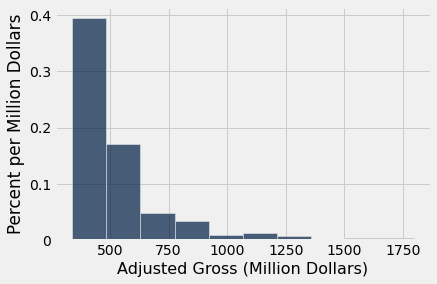

In [8]:
millions.hist('Adjusted Gross', unit="Million Dollars")

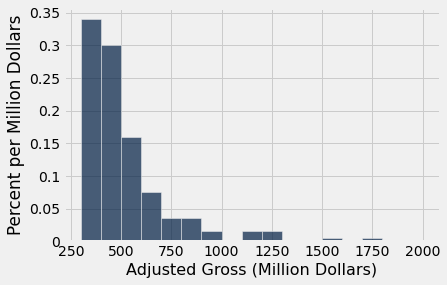

In [9]:
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), unit="Million Dollars")

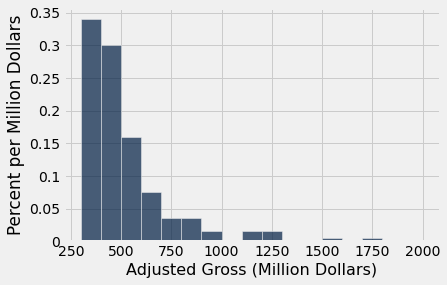

In [10]:
millions.hist('Adjusted Gross', bins=np.arange(300,2001,100), unit="Million Dollars")

In [11]:
bin_counts.show(3)

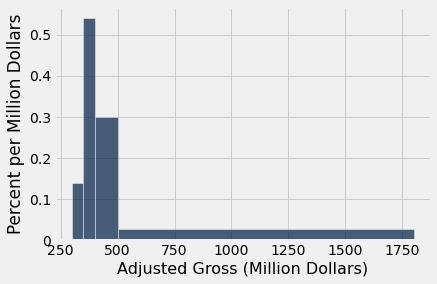

In [12]:
uneven = make_array(300, 350, 400, 500, 1800)
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")

In [13]:
millions.bin('Adjusted Gross', bins=uneven)

bin  | Adjusted Gross count
300  | 14
350  | 54
400  | 60
500  | 72
1800 | 0

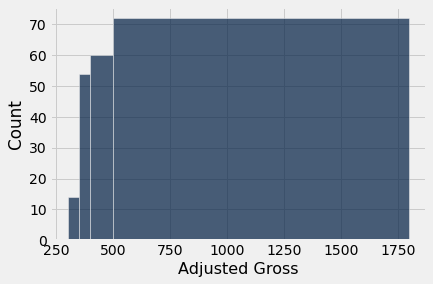

In [14]:
millions.hist('Adjusted Gross', bins=uneven, normed=False)

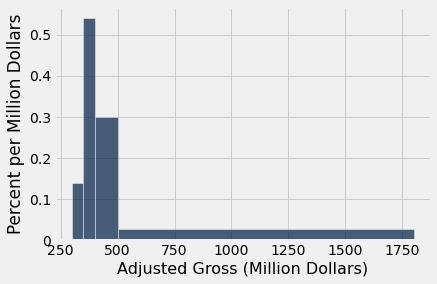

In [15]:
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")

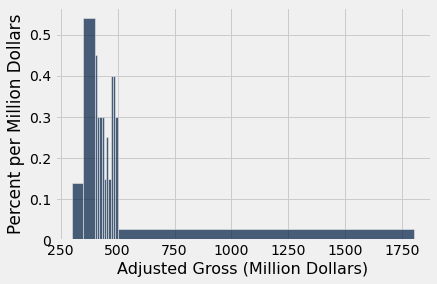

In [16]:
some_tiny_bins = make_array(
    300, 350, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 1800)
millions.hist('Adjusted Gross', bins=some_tiny_bins, unit='Million Dollars')

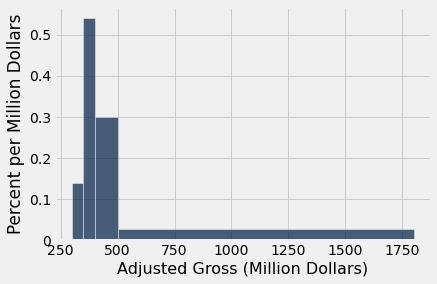

In [17]:
millions.hist('Adjusted Gross', bins=uneven, unit="Million Dollars")

In [18]:
histogram_elements = millions.bin('Adjusted Gross', bins=uneven).relabeled(1, 'count')
histogram_elements

bin  | count
300  | 14
350  | 54
400  | 60
500  | 72
1800 | 0

In [19]:
total_count = sum(histogram_elements.column('count'))
percents = np.round(100*histogram_elements.column('count')/total_count, 2)
histogram_elements = histogram_elements.with_columns('percent', percents)
histogram_elements

bin  | count | percent
300  | 14    | 7
350  | 54    | 27
400  | 60    | 30
500  | 72    | 36
1800 | 0     | 0

In [20]:
bin_widths = np.diff(histogram_elements.column('bin'))
num_bins = histogram_elements.num_rows - 1    # the number of bins
histogram_elements = histogram_elements.take(
    np.arange(num_bins)).with_columns(
    'width', bin_widths
)
histogram_elements

bin  | count | percent | width
300  | 14    | 7       | 50
350  | 54    | 27      | 50
400  | 60    | 30      | 100
500  | 72    | 36      | 1300

In [21]:
heights = np.round(
    histogram_elements.column('percent')/histogram_elements.column('width'),2)
histogram_elements = histogram_elements.with_columns('height', heights)
histogram_elements

bin  | count | percent | width | height
300  | 14    | 7       | 50    | 0.14
350  | 54    | 27      | 50    | 0.54
400  | 60    | 30      | 100   | 0.3
500  | 72    | 36      | 1300  | 0.03

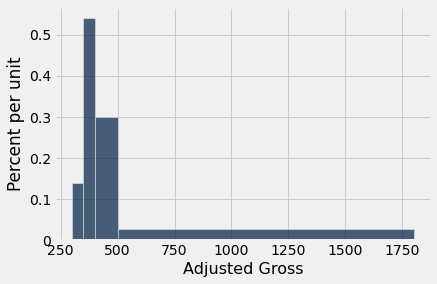

In [22]:
millions.hist('Adjusted Gross', bins=uneven)